In [2]:
import pandas as pd
import numpy as np

In [3]:
#importing the clean data
df = pd.read_csv('/Users/manika/Desktop/Python : Learning/healthcare-accessibility-index/data/clean/healthcare_accessibility_index.csv')


In [4]:
# Creating column: Facilities per 100k people

df['facility_100k'] = ((df['facility_count']/df['population_2023'])*100000).round(2)

In [5]:

# Normalizing the different factors and inverting the time as less time means better score
df['travel_norm'] = 1 - (
    (df['avg_travel_time_min'] - df['avg_travel_time_min'].min()) /
    (df['avg_travel_time_min'].max() - df['avg_travel_time_min'].min())
)


In [6]:

# Normalize other features (higher = better)
df['insured_norm'] = (df['insured'] - df['insured'].min()) / (df['insured'].max() - df['insured'].min())
df['broadband_norm'] = (df['broadband'] - df['broadband'].min()) / (df['broadband'].max() - df['broadband'].min())
df['income_norm'] = (df['median_income($1k)'] - df['median_income($1k)'].min()) / (df['median_income($1k)'].max() - df['median_income($1k)'].min())
df['facility_norm'] = (df['facility_count'] - df['facility_count'].min()) / (df['facility_count'].max() - df['facility_count'].min())


In [7]:
# Access score
df['access_score'] = (
    0.25 * df['insured_norm'] +
    0.20 * df['broadband_norm'] +
    0.20 * df['income_norm'] +
    0.25 * df['facility_norm'] +
    0.10 * df['travel_norm']
) * 100

df['access_score'] = df['access_score'].round(2)


In [15]:
# exporting the weights for later comparison

import json

manual_feature_weights = {
    'insured': 0.25,
    'broadband': 0.20,
    'median_income($1k)': 0.20,
    'facility_100k': 0.25,
    'avg_travel_time_min': 0.10
}

# Save to a file
with open("/Users/manika/Desktop/Python : Learning/healthcare-accessibility-index/data/clean/manual_feature_weights.json", "w") as f:
    json.dump(manual_feature_weights, f)


In [8]:
# adding rank
df['access_rank'] = df['access_score'].rank(ascending=False).astype(int)
df = df.sort_values(by='access_score', ascending=False).reset_index(drop=True)


In [13]:
df.to_csv('/Users/manika/Desktop/Python : Learning/healthcare-accessibility-index/data/clean/merge_healthcare_accessibility_index.csv', index=False)

Visualizing the Scenario

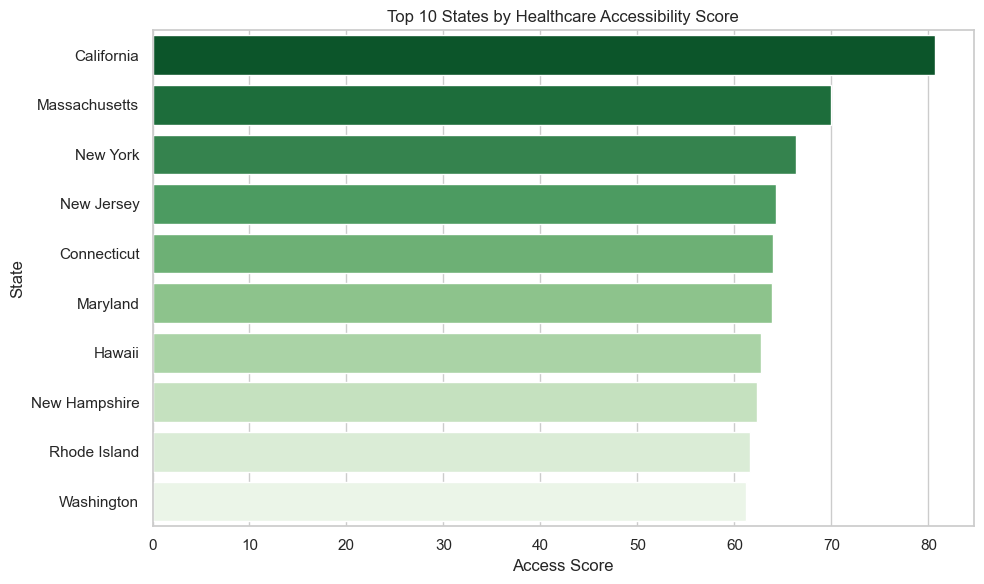

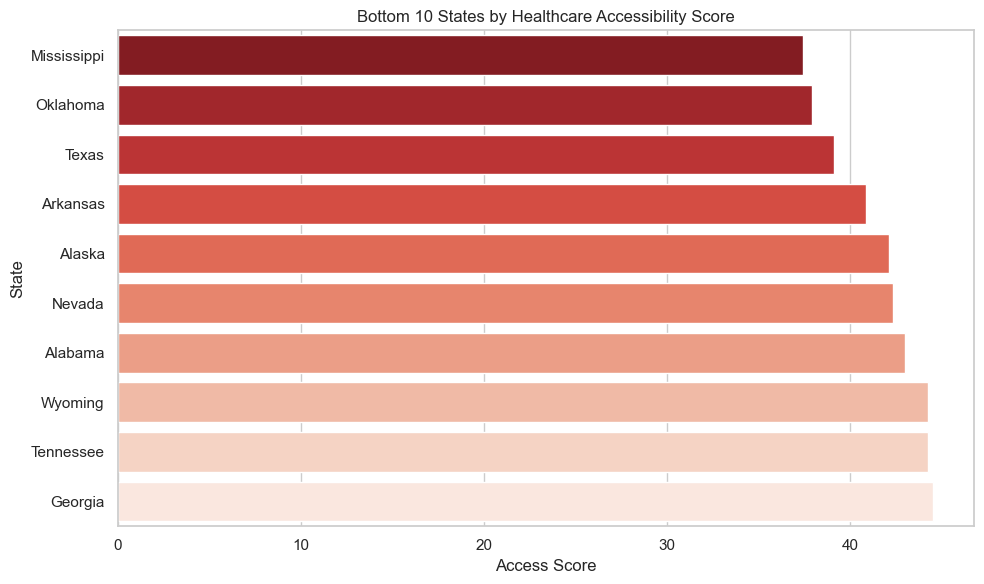

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set aesthetic style
sns.set(style="whitegrid")

# Top 10 states
plt.figure(figsize=(10, 6))
top10 = df.sort_values('access_score', ascending=False).head(10)
sns.barplot(data=top10, y='state', x='access_score', palette='Greens_r')
plt.title("Top 10 States by Healthcare Accessibility Score")
plt.xlabel("Access Score")
plt.ylabel("State")
plt.tight_layout()
plt.show()

# Bottom 10 states
plt.figure(figsize=(10, 6))
bottom10 = df.sort_values('access_score', ascending=True).head(10)
sns.barplot(data=bottom10, y='state', x='access_score', palette='Reds_r')
plt.title("Bottom 10 States by Healthcare Accessibility Score")
plt.xlabel("Access Score")
plt.ylabel("State")
plt.tight_layout()
plt.show()


In [11]:

# Full state name to abbreviation mapping
state_to_abbr = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR',
    'California': 'CA', 'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE',
    'Florida': 'FL', 'Georgia': 'GA', 'Hawaii': 'HI', 'Idaho': 'ID',
    'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS',
    'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD',
    'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS',
    'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV',
    'New Hampshire': 'NH', 'New Jersey': 'NJ', 'New Mexico': 'NM',
    'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND',
    'Ohio': 'OH', 'Oklahoma': 'OK', 'Oregon': 'OR', 'Pennsylvania': 'PA',
    'Rhode Island': 'RI', 'South Carolina': 'SC', 'South Dakota': 'SD',
    'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT',
    'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV',
    'Wisconsin': 'WI', 'Wyoming': 'WY', 'District of Columbia': 'DC'
}

# Apply the mapping
df['state_abbr'] = df['state'].map(state_to_abbr)



In [17]:
import plotly.express as px

fig = px.choropleth(
    df,
    locations='state_abbr',
    locationmode='USA-states',
    color='access_score',
    scope='usa',
    color_continuous_scale='Plasma',
    title='Healthcare Accessibility Score by State (based on manual given weightage)'
)
fig.show()


In [18]:
#exporting map for streamlit 
import plotly.io as pio
pio.write_json(fig, "/Users/manika/Desktop/Python : Learning/healthcare-accessibility-index/data/final_choropleth_map.json")
